### NBA Dataset



In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap,LocallyLinearEmbedding
import umap
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import math
import numpy as np
import cv2

In [3]:
nba_df = pd.read_csv("./nba_2022-23_all_stats_with_salary.csv")
nba_df.drop(columns=nba_df.columns[0], inplace=True)

### Question 1

The code in the cell below was taken and adjusted from code found in a notebook on the course page. The cell below creates a function that plots all the features of a given dataset. It checks what the dtype of the column is and if its an object dtype, meaning categorical or non-numerical data, it creates a bar plot of the feature. If the dtype is numerical it then creates a histogram plot with the kernel density estimate used to smooth the distribution and shown as a line on the plot.

In [68]:
def plot_distribution(dataset, cols=5, width=30, height=30, hspace=0.2, wspace=0.5):

    sns.set_style('whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        
        if dataset.dtypes[column] == object:
           
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
            
        
        else:
            
            g = sns.histplot(dataset[column],kde=True)
            plt.xticks(rotation=25)

The cells below call the plotting function on the entire dataset in two plots for readibility. 

The player names is a bar plot but as there only unique names, the 467 lines do not appear on the plot unless it is enlarged completely. However this number of unique names is expected as not one player on the NBA shares an exact full name.

The salary plot makes intuitive sense, no negative salaries are evident and as the salary climbs the count decreases.

The position feature is also categorical. There exists only 5 actual basketball positions, however the plot below indicates that there is 9. These additional 4 positions appear to be combinations of the base 5 positions, indicating that the players of these combination positions play at both of the combined positions. However the count is very low for all the four combinations of positions, indicating that players mainly play in a single position which makes intuitive sense.

The Age feature appears normal, with no ages appearing too young or too old for basketball players and none of them appearing negative

The team feature is the last non-numerical feature and consists of all the teams in the NBA. There are only 30 teams within the NBA, however some datapoints under the Team feature appear to be combined, for example "BRK/PHO". These are two separate teams, the Brooklyn Nets and Phoenix Suns. The combination of these teams shows that within the 2022/23 season, a player played for both teams. This combination of teams indicates the increase in the number of teams within the dataset.

Subsequently, the dataset consists of various statistics, from per game statistics, to shooting efficiency statistics. They are all of either discrete or continuous numerical dtype. Certain features are percentage measure of performance, there their values should not exceed 100, and they do not. Therefore after analysing the following plots, all statistics that need to be discrete are plotted as such and the same is said for the continuous features as well as the features that represent percentages. Therefore no points seem odd within the dataset.

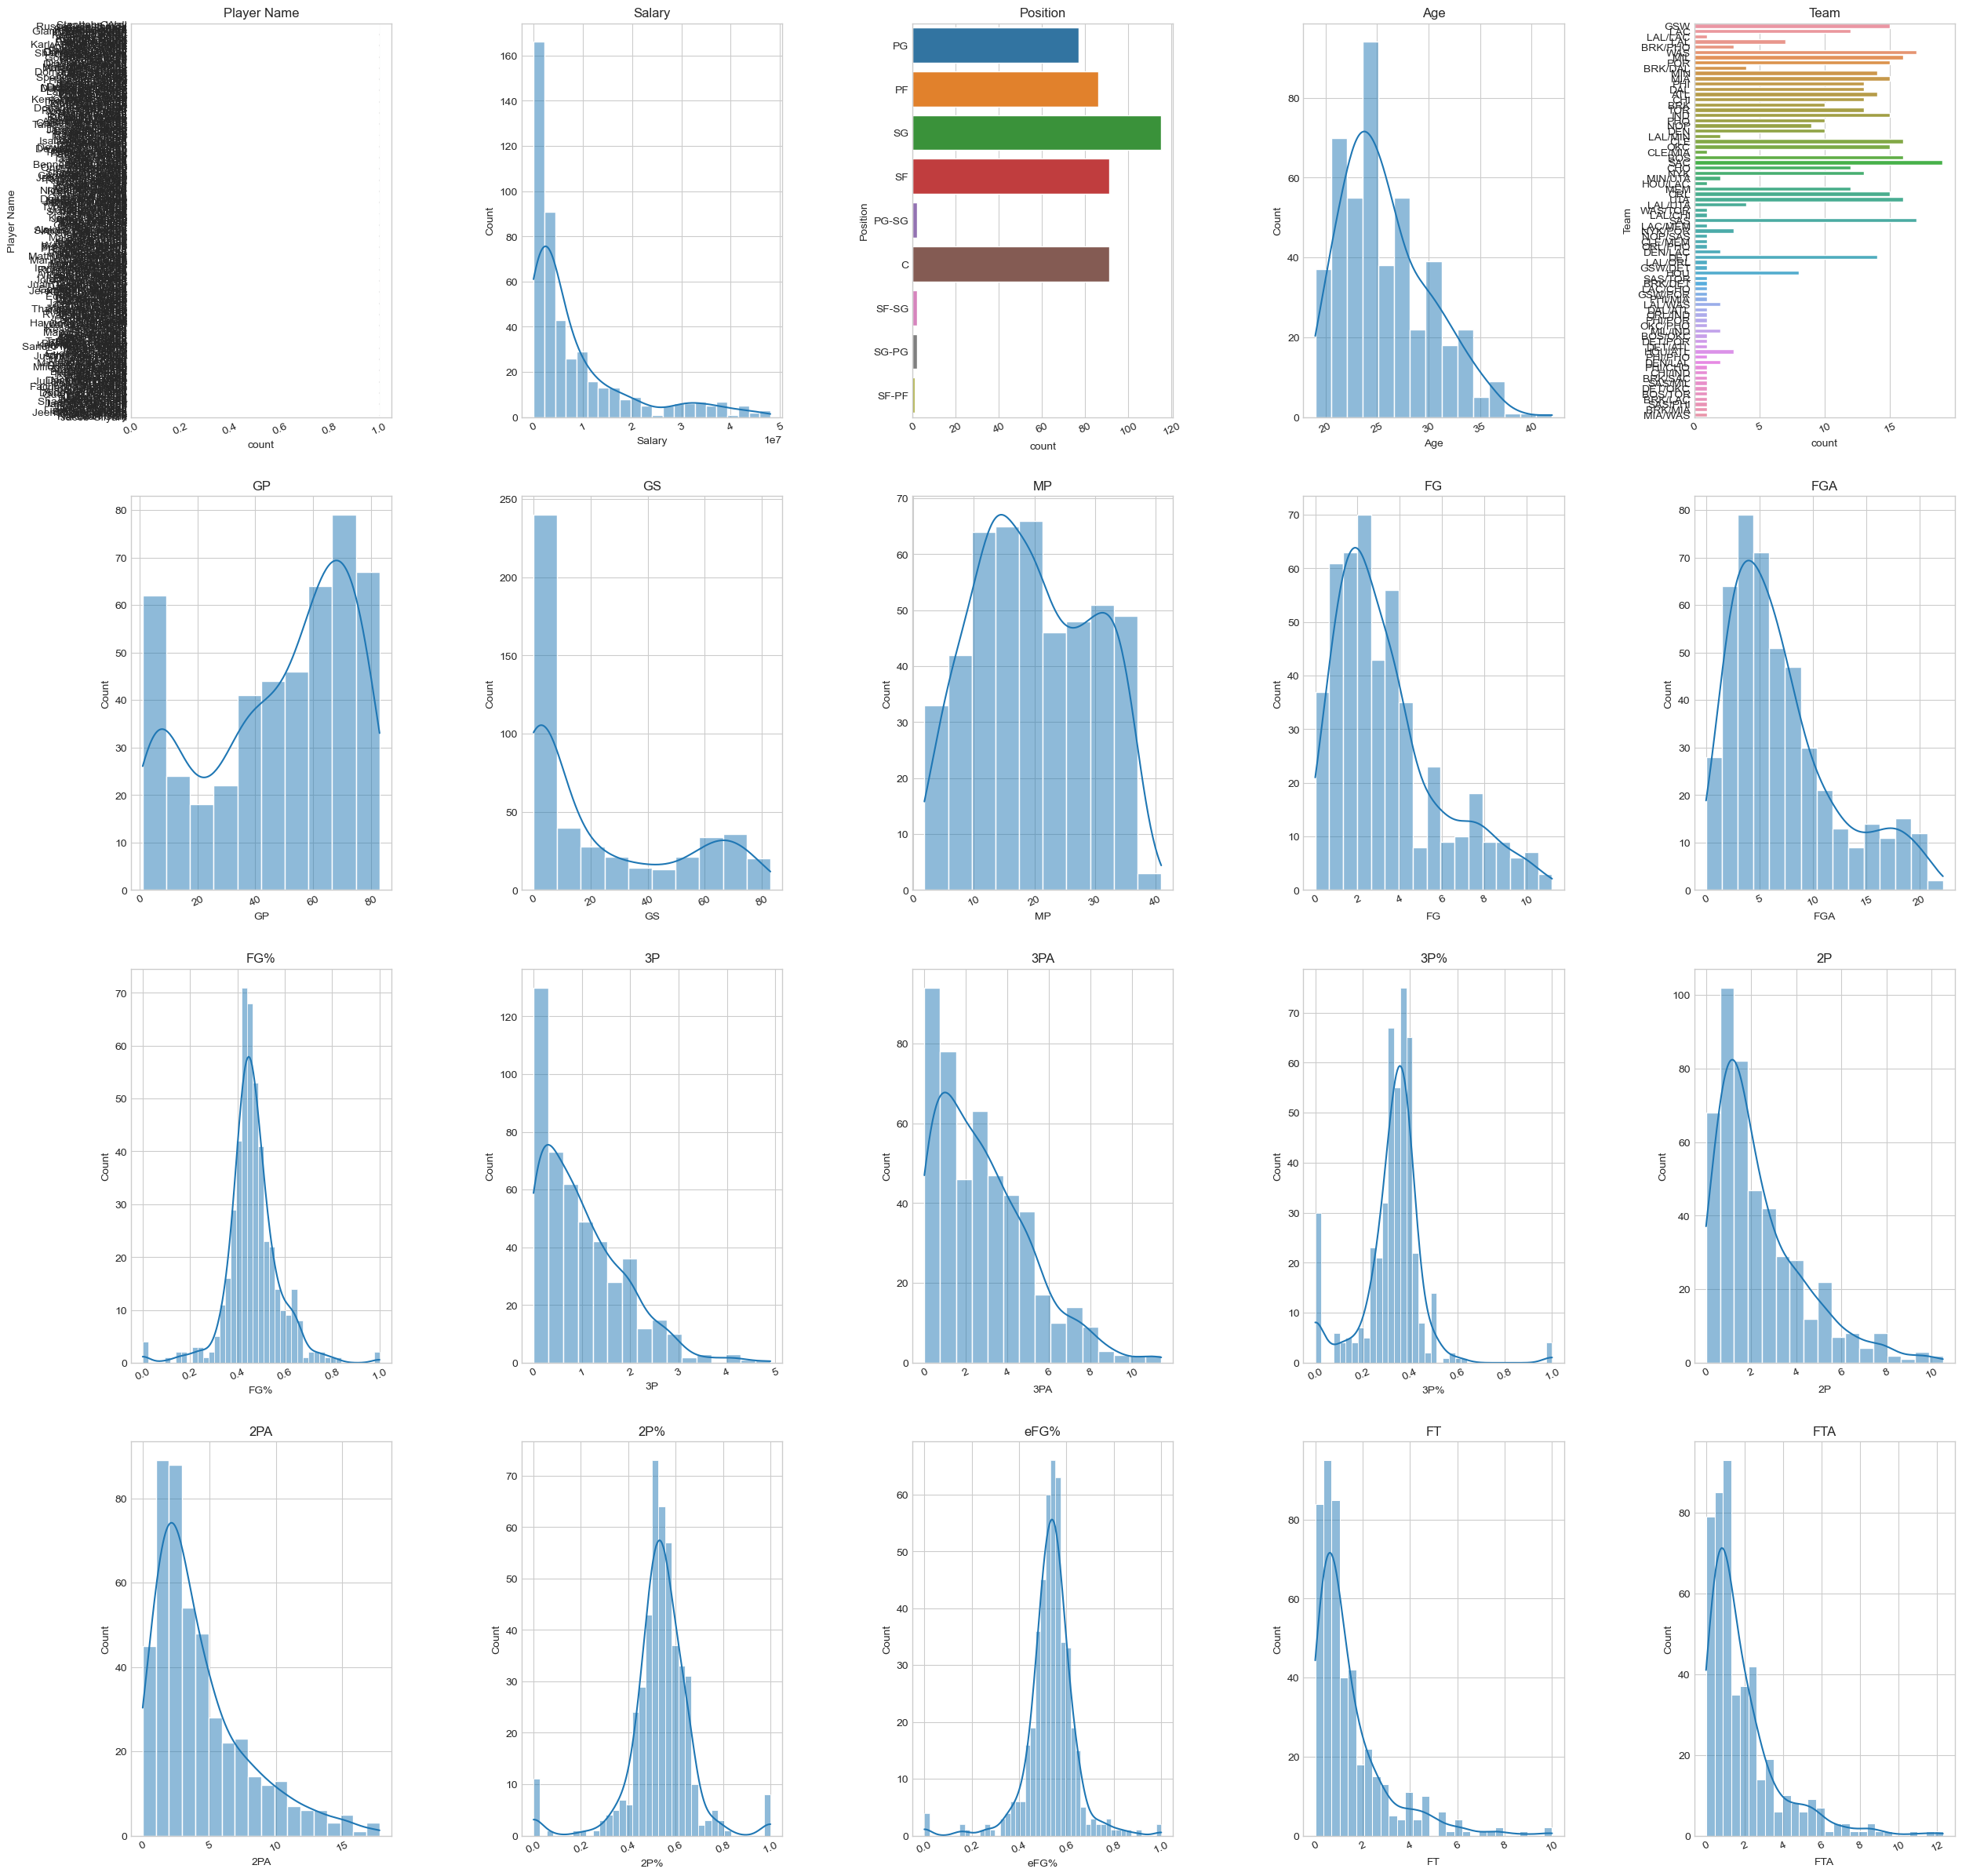

In [71]:
plot_distribution(nba_df.iloc[:,:20])

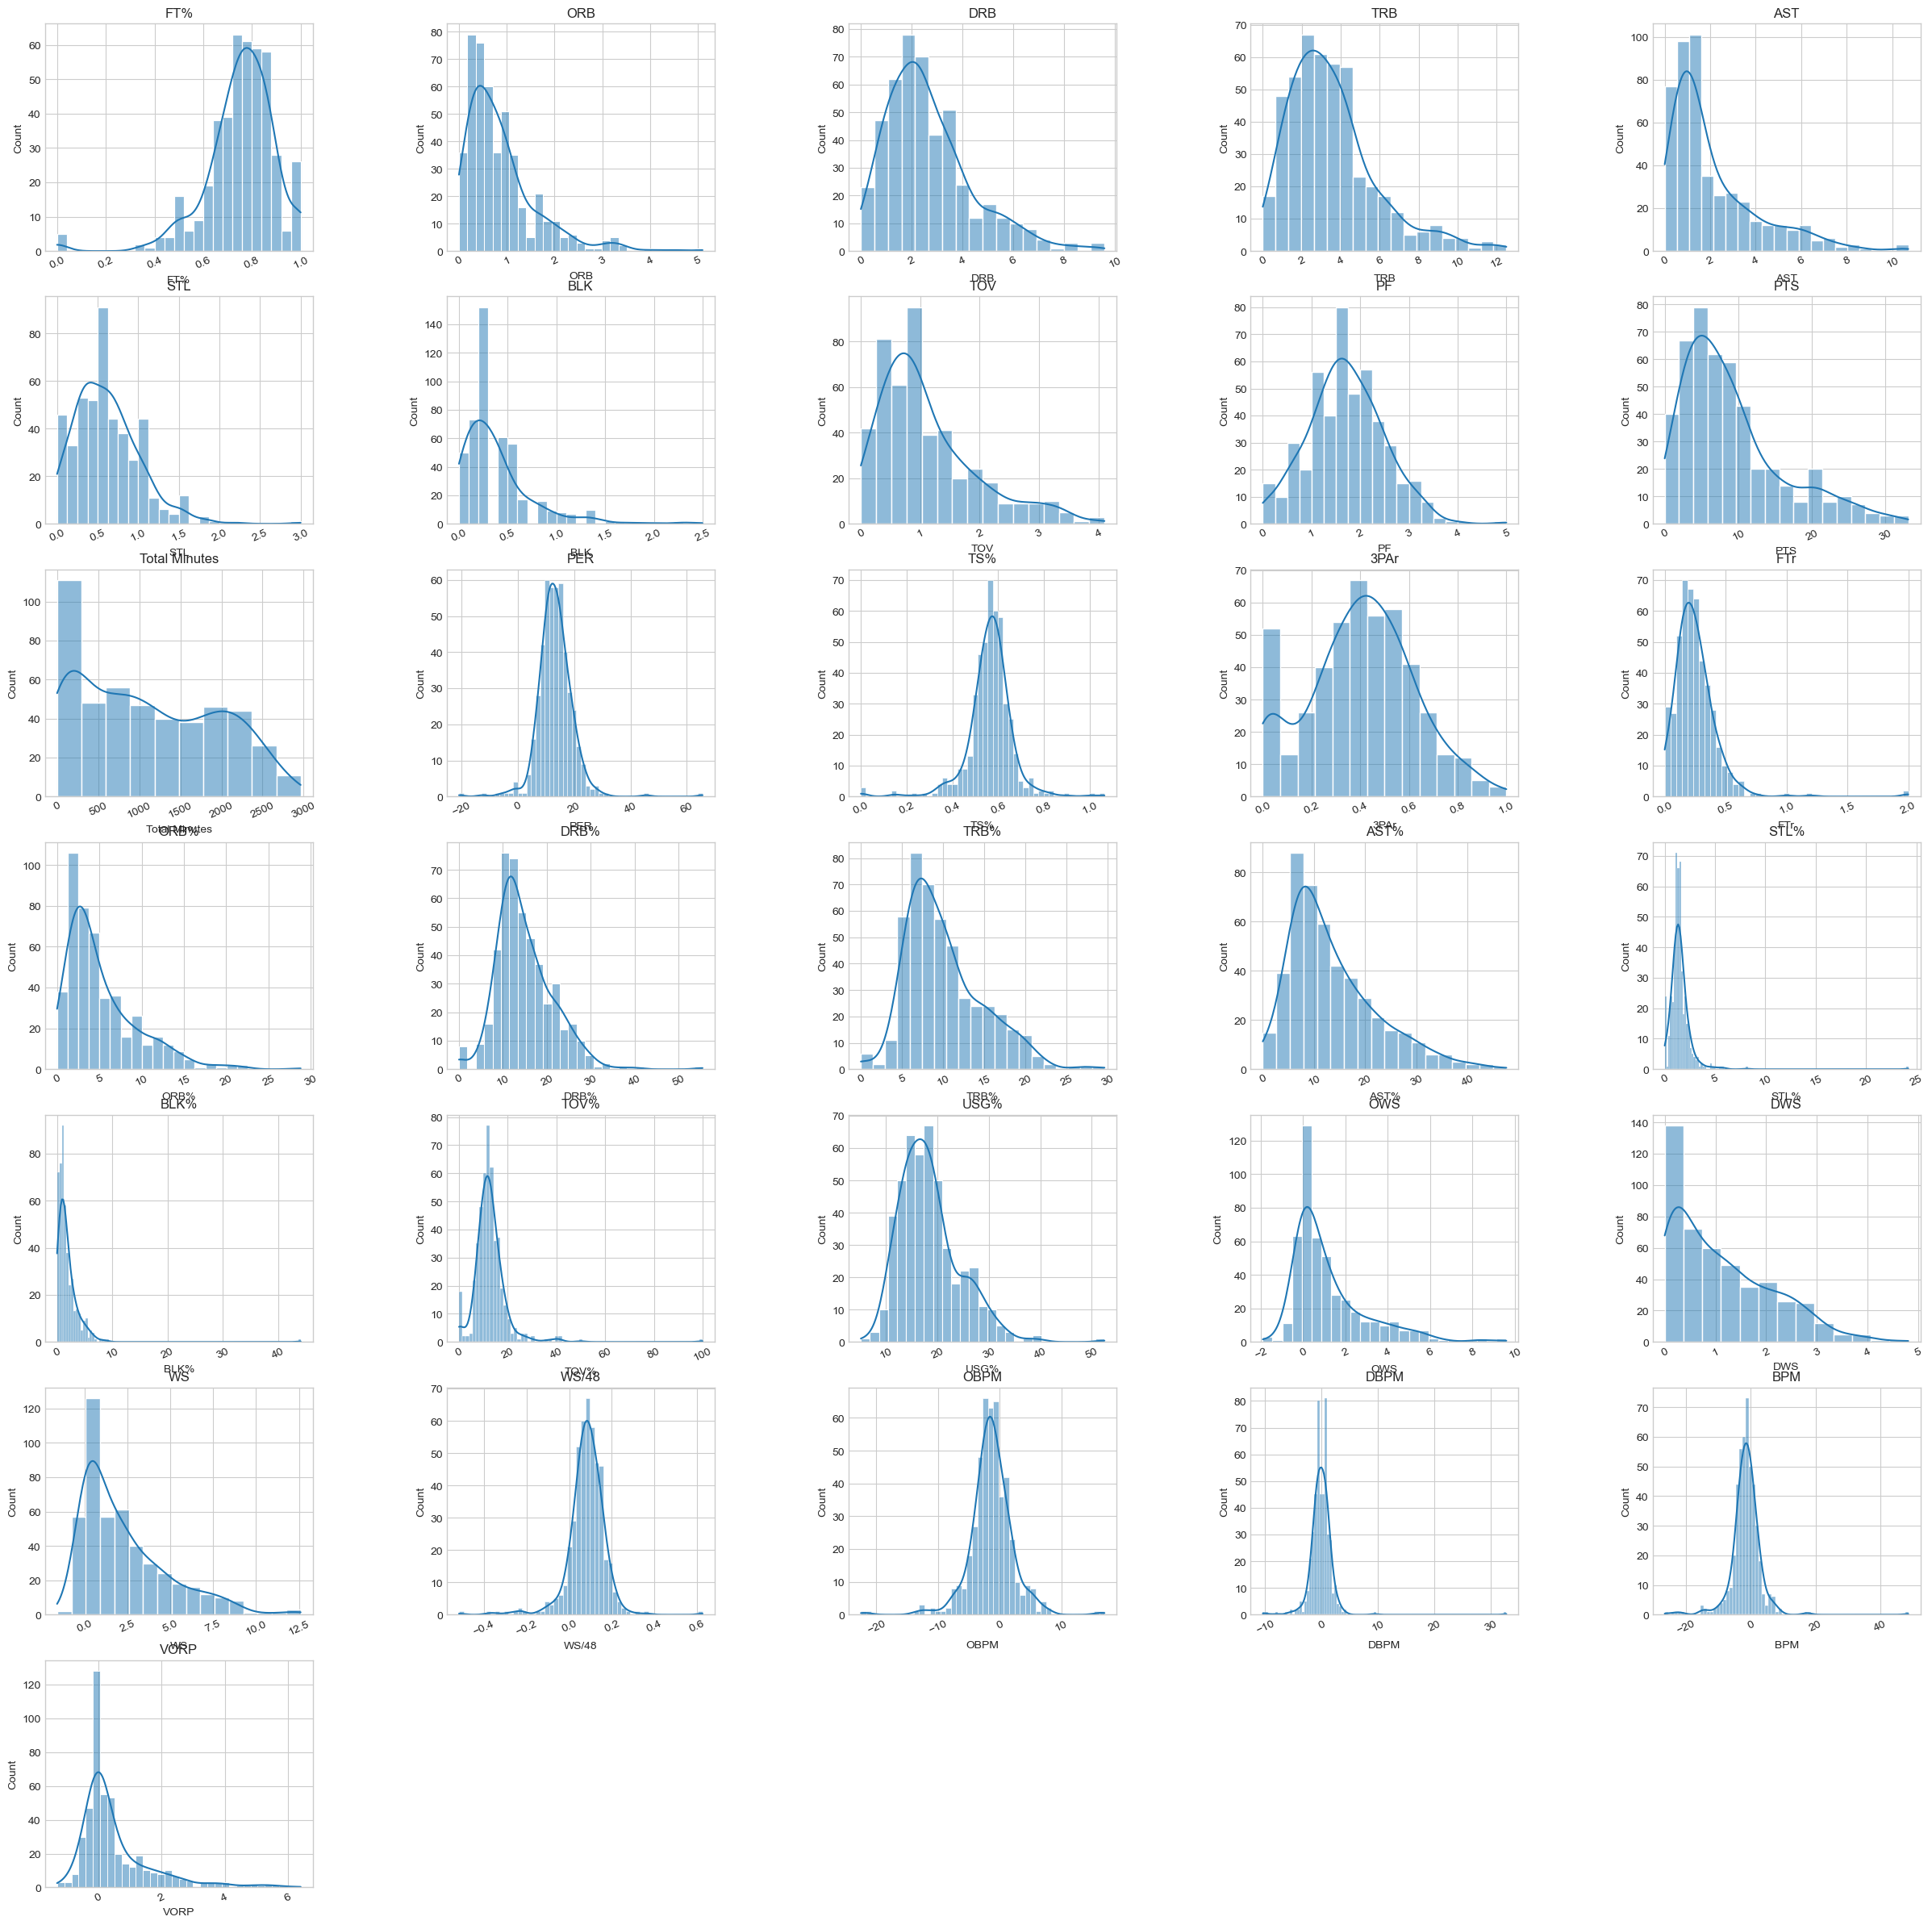

In [72]:
plot_distribution(nba_df.iloc[:,20:])

Additional analysis is provided by plotting the top 10 players by salary and categorising them by team and then position. It can be seen that the top 3 paid players are PG's, point guards, and the following two are PF's, power forwards. It is seen that Stephen Curry of the Golden State Warriors was the highest paid NBA athlete for the 2022/23 season.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3700\3694797090.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<Axes: xlabel='Player Name', ylabel='Salary'>

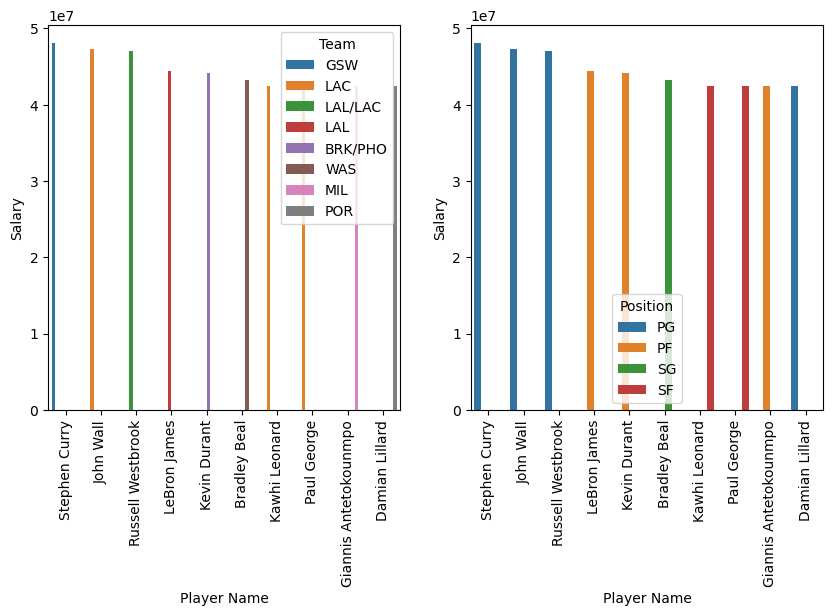

In [68]:
top_10_salaries = nba_df.sort_values(by='Salary', ascending=False).head(10)
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(top_10_salaries,x="Player Name",y="Salary",hue="Team")

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(top_10_salaries,x="Player Name",y="Salary",hue="Position")



The cell below shows the types of the features within the dataset. There are three non-numerical, categorical features, the rest are either int64 which indicate discrete values or float64 which indicate continuous variables. All features that intuitively would be discrete are discrete (for example games played), and the same can be said for the continuous variables (for example field goal percentage).

In [5]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

The cell below shows the first 5 entries of the dataset

In [3]:
nba_df.head()

Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]

The cell below illustrates various descriptive statistics of the features, all of which seem reasonable.

In [4]:
nba_df.describe()

Unnamed: 0        Salary         Age          GP          GS  \
count  467.000000  4.670000e+02  467.000000  467.000000  467.000000   
mean   233.000000  8.416599e+06   25.820128   48.233405   22.650964   
std    134.955548  1.070812e+07    4.275113   24.807740   27.094577   
min      0.000000  5.849000e+03   19.000000    1.000000    0.000000   
25%    116.500000  1.782621e+06   23.000000   31.000000    1.000000   
50%    233.000000  3.722040e+06   25.000000   55.000000    8.000000   
75%    349.500000  1.063354e+07   29.000000   68.500000   45.500000   
max    466.000000  4.807001e+07   42.000000   83.000000   83.000000   

               MP          FG         FGA         FG%          3P  ...  \
count  467.000000  467.000000  467.000000  466.000000  467.000000  ...   
mean    19.871306    3.351392    7.117773    0.465009    0.996574  ...   
std      9.548684    2.457836    5.020700    0.109547    0.880468  ...   
min      1.800000    0.000000    0.000000    0.000000    0.000000  ...   
25%     12.500000    1.600000    3.300000    0.417000    0.300000  ...   
50%     19.200000    2.700000    5.800000    0.455000    0.800000  ...   
75%     28.300000    4.300000    9.400000    0.507500    1.500000  ...   
max     41.000000   11.200000   22.200000    1.000000    4.900000  ...   

             TOV%        USG%         OWS         DWS          WS       WS/48  \
count  467.000000  467.000000  467.000000  467.000000  467.000000  467.000000   
mean    12.735974   18.425910    1.208351    1.120557    2.328908    0.081771   
std      7.198533    5.909528    1.765160    0.980478    2.533094    0.088089   
min      0.000000    5.100000   -1.900000    0.000000   -1.600000   -0.517000   
25%      9.500000   14.300000    0.000000    0.300000    0.300000    0.047000   
50%     11.900000   17.600000    0.600000    0.900000    1.500000    0.087000   
75%     15.000000   21.150000    1.800000    1.800000    3.550000    0.129500   
max    100.000000   52.500000    9.600000    4.800000   12.600000    0.626000   

             OBPM        DBPM         BPM        VORP  
count  467.000000  467.000000  467.000000  467.000000  
mean    -1.344968   -0.087152   -1.432548    0.539829  
std      3.578193    2.243437    4.925175    1.172960  
min    -22.500000  -10.400000  -26.500000   -1.300000  
25%     -2.900000   -0.900000   -3.300000   -0.100000  
50%     -1.300000   -0.100000   -1.300000    0.100000  
75%      0.450000    0.800000    0.600000    0.800000  
max     17.000000   32.700000   48.600000    6.400000  

[8 rows x 49 columns]

The cell below gives statistics of the categorical features

In [4]:
nba_df.describe(include=['O'])

Player Name Position Team
count             467      467  467
unique            467        9   75
top     Stephen Curry       SG  SAC
freq                1      115   19

### Question 2

The cell below identifies the features with missing datapoints and displays the missing datapoints as a count next to the corresponding feature. Therefore it can be seen that FG% has 1 missing value, 3P% has 13 missing values, 2P% has 4 missing values and so on. With the aim of plotting the data in 2D/3D, missing values need to be removed or interpolated/imputed, there can be no missing datapoints within the dataset. With this in mind and seeing as the number of missing datapoints collectively being 45, which doesnt even make up 10% of the dataset, these missing datapoints have been chosen to be removed from the dataset as this will have little affect on the dataset.

In [73]:

missing_values = nba_df.isna()  
missing_counts = missing_values.sum()
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)


FG%      1
3P%     13
2P%      4
eFG%     1
FT%     23
TS%      1
3PAr     1
FTr      1
dtype: int64


The cell below removes all the aforementioned missing datapoints in each of the respective features

In [7]:
df_cleaned = nba_df.dropna(subset= ['FG%', '3P%','2P%','eFG%','FT%','TS%','3PAr','FTr'])

It can now be seen in the cell below that there are now no missing datapoints within the dataset

In [74]:
missing_values = df_cleaned.isna()  
missing_counts = missing_values.sum()
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


### Question 3

Before the data can be reduced using the below methods, the categorical features need to be encoded. The use of the LabelEncoder from sklearn is implemented to numerically encode the categorical features. The cell below implemenents this encoding. With reference to the displayed datapoints in the new dataframe, the three new numerically encoded columns can be seen.

In [8]:
label_encoder = LabelEncoder()

#Encoding the three categorical features into three new columns, Name_encoded, Position_encoded and Team_encoded
df_cleaned['Name_encoded'] = label_encoder.fit_transform(df_cleaned['Player Name'])
df_cleaned['Position_encoded'] = label_encoder.fit_transform(df_cleaned['Position'])
df_cleaned['Team_encoded'] = label_encoder.fit_transform(df_cleaned['Team'])

df_cleaned = df_cleaned.drop(['Player Name','Team','Position'],axis=1)
df_cleaned.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_31328\3744197163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name_encoded'] = label_encoder.fit_transform(df_cleaned['Player Name'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_31328\3744197163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position_encoded'] = label_encoder.fit_transform(df_cleaned['Position'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_31328\3744197163.py:6: SettingWithCopyWarning: 
A value is trying to be set 

Salary  Age  GP  GS    MP    FG   FGA    FG%   3P   3PA  ...  DWS   WS  \
0  48070014   34  56  56  34.7  10.0  20.2  0.493  4.9  11.4  ...  2.0  7.8   
1  47345760   32  34   3  22.2   4.1   9.9  0.408  1.0   3.2  ...  0.7  0.3   
2  47080179   34  73  24  29.1   5.9  13.6  0.436  1.2   3.9  ...  2.6  1.9   
3  44474988   38  55  54  35.5  11.1  22.2  0.500  2.2   6.9  ...  2.4  5.6   
4  44119845   34  47  47  35.6  10.3  18.3  0.560  2.0   4.9  ...  2.1  6.8   

   WS/48  OBPM  DBPM  BPM  VORP  Name_encoded  Position_encoded  Team_encoded  
0  0.192   7.5   0.1  7.5   4.7           385                 2            24  
1  0.020  -0.8  -0.4 -1.2   0.1           215                 2            31  
2  0.044   0.3  -0.1  0.2   1.2           367                 2            35  
3  0.138   5.5   0.6  6.1   4.0           279                 1            33  
4  0.194   6.0   1.2  7.1   3.9           259                 1             7  

[5 rows x 51 columns]

### t-SNE

Dimensionality reduction using t-Distributed Stochastic Neighbor Embedding (t-SNE) is implemented and plotted in three dimensions below. There are three plots visualised for this form of dimensionality reduction. Each plot colours and categorizes within one of the three categorical features of the original dataset. Therefore there is a plot where the Points are catergorized by the name of the player, a plot where he points are categorized by the position and finally a plot where they are categorized by the team.

In [12]:
tsne = TSNE(n_components=3, random_state=0,perplexity=30, n_iter=5000)
tsne_reduced = tsne.fit_transform(df_cleaned)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



The plot below is the plot where the points are categorized by the position

In [16]:
df_reduced_tsne = pd.DataFrame(tsne_reduced, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_tsne["Player Name"] = nba_df["Player Name"]
df_reduced_tsne["Position"] = nba_df["Position"]
df_reduced_tsne["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_tsne,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Position",
    size_max=10,  
    labels={"color": "Position"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/tsne.jpg")
fig.show()


The plot below is the plot where the points are categorized by the team

In [17]:
df_reduced_tsne = pd.DataFrame(tsne_reduced, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_tsne["Player Name"] = nba_df["Player Name"]
df_reduced_tsne["Position"] = nba_df["Position"]
df_reduced_tsne["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_tsne,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Team",
    size_max=10,  
    labels={"color": "Team"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/tsne_team.jpg")
fig.show()


The plot below is the plot where the points are categorized by the name of the player

In [18]:
df_reduced_tsne = pd.DataFrame(tsne_reduced, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_tsne["Player Name"] = nba_df["Player Name"]
df_reduced_tsne["Position"] = nba_df["Position"]
df_reduced_tsne["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_tsne,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Player Name",
    size_max=10,  
    labels={"color": "Player Name"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/tsne_player.jpg")
fig.show()


If the above three interactive plots arent showing and you cannot run the all the cells, here is a subplot of static images of the above plots

In [38]:
def plot_images(path1,path2,path3):

    image1 = cv2.imread(path1)  
    image2 = cv2.imread(path2)  
    image3 = cv2.imread(path3) 
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(20, 20))


    plt.subplot(3, 1, 1)
    plt.imshow(image1_rgb)
    plt.axis("off")
    plt.subplot(3, 1, 2)
    plt.imshow(image2_rgb)
    plt.axis("off")
    plt.subplot(3, 1, 3)
    plt.imshow(image3_rgb)
    plt.axis("off")
    plt.show()


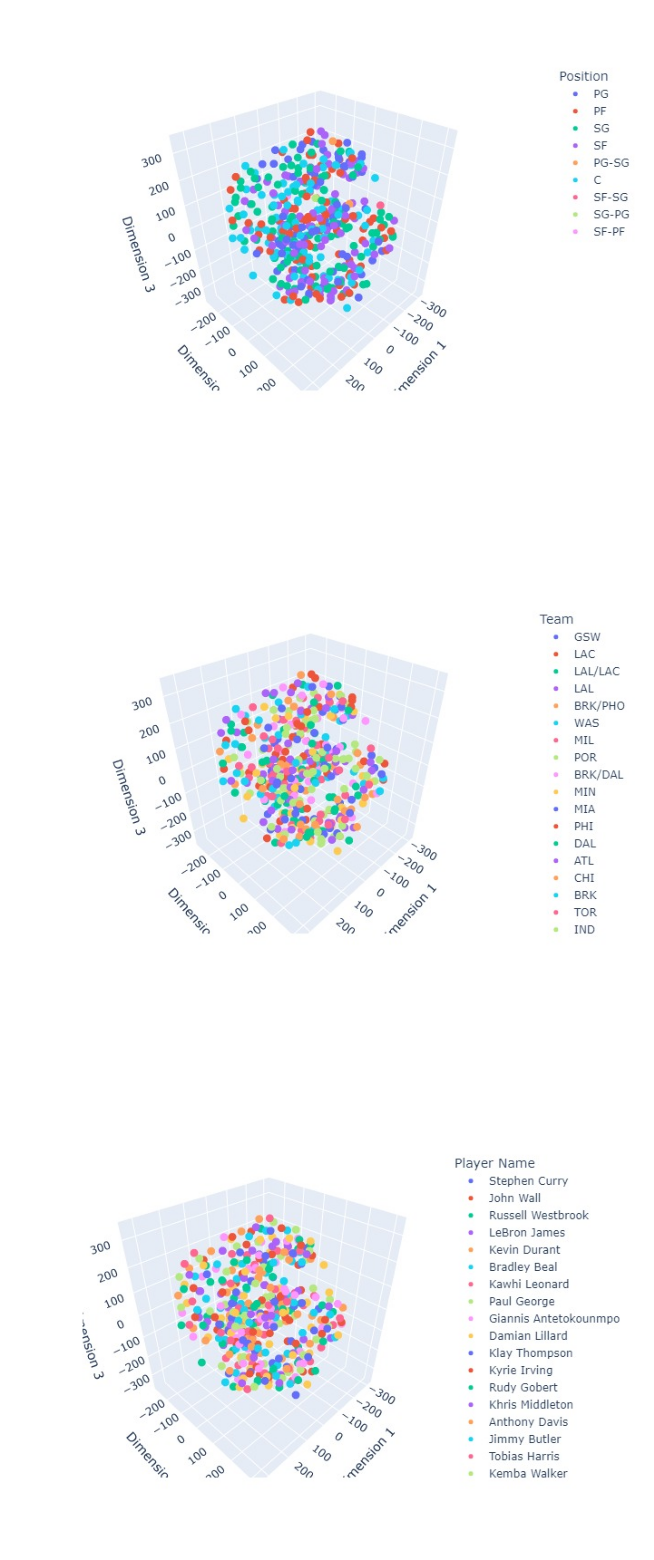

In [39]:
plot_images('./images/tsne.jpg','./images/tsne_team.jpg','./images/tsne_player.jpg')

### UMAP

Dimensionality reduction is performed by the method of Uniform Manifold Approximation and Projection (UMAP) and the data is plotted in 3 dimensions below. Again three plots are given, each categorising the data by one of the categorical features of the dataset

In [19]:
umap_model = umap.UMAP(n_components=3,n_neighbors=30)
reduced_data_umap = umap_model.fit_transform(df_cleaned)


The plot below is the plot where the points are categorized by the position

In [20]:
df_reduced_umap= pd.DataFrame(reduced_data_umap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_umap["Player Name"] = nba_df["Player Name"]
df_reduced_umap["Position"] = nba_df["Position"]
df_reduced_umap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_umap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Position",
    size_max=10,  
    labels={"color": "Position"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/umap.jpg")
fig.show()


The plot below is the plot where the points are categorized by the team

In [21]:
df_reduced_umap= pd.DataFrame(reduced_data_umap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_umap["Player Name"] = nba_df["Player Name"]
df_reduced_umap["Position"] = nba_df["Position"]
df_reduced_umap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_umap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Team",
    size_max=10,  
    labels={"color": "Team"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/umap_team.jpg")
fig.show()


The plot below is the plot where the points are categorized by the name of the player

In [22]:
df_reduced_umap= pd.DataFrame(reduced_data_umap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_umap["Player Name"] = nba_df["Player Name"]
df_reduced_umap["Position"] = nba_df["Position"]
df_reduced_umap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_umap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Player Name",
    size_max=10,  
    labels={"color": "Player Name"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/umap_player.jpg")
fig.show()


Again the plots have been saved as images incase they do not render

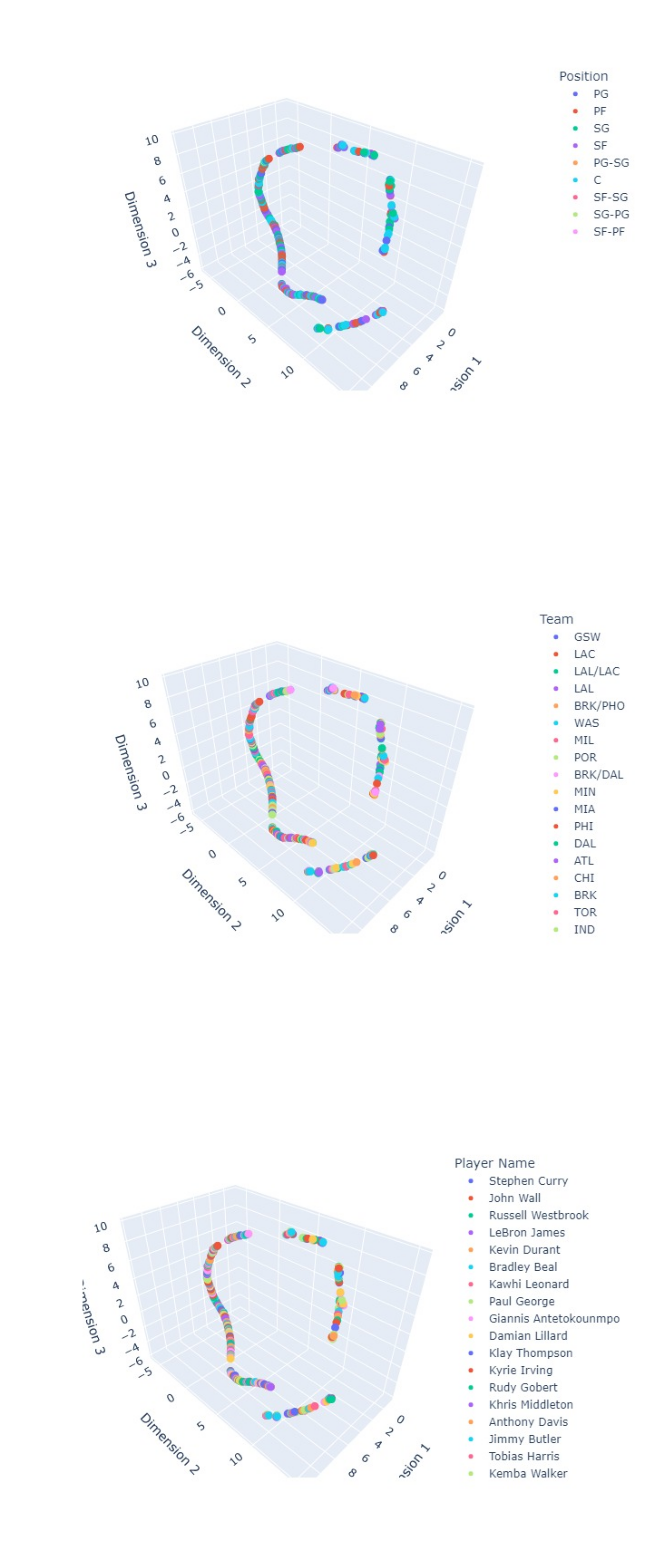

In [40]:
plot_images("./images/umap.jpg","./images/umap_team.jpg","./images/umap_player.jpg")

### ISOMAP

Finally, dimensionality reduction is performed by the ISOMAP method. As with the previous two dimensionality reduction methods, three plots defined by the three categories is given

In [23]:
isomap_model = Isomap(n_neighbors=60, n_components=3)

reduced_data_isomap = isomap_model.fit_transform(df_cleaned)

The plot below is the plot where the points are categorized by the position

In [24]:
df_reduced_isomap = pd.DataFrame(reduced_data_isomap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_isomap["Player Name"] = nba_df["Player Name"]
df_reduced_isomap["Position"] = nba_df["Position"]
df_reduced_isomap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_isomap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Position",
    size_max=10,  
    labels={"color": "Position"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/isomap.jpg")
fig.show()


The plot below is the plot where the points are categorized by the team

In [25]:
df_reduced_isomap = pd.DataFrame(reduced_data_isomap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_isomap["Player Name"] = nba_df["Player Name"]
df_reduced_isomap["Position"] = nba_df["Position"]
df_reduced_isomap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_isomap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Team",
    size_max=10,  
    labels={"color": "Team"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/isompa_team.jpg")
fig.show()


The plot below is the plot where the points are categorized by the name of the player

In [26]:
df_reduced_isomap = pd.DataFrame(reduced_data_isomap, columns=["Dimension 1", "Dimension 2", "Dimension 3"])


df_reduced_isomap["Player Name"] = nba_df["Player Name"]
df_reduced_isomap["Position"] = nba_df["Position"]
df_reduced_isomap["Team"] = nba_df["Team"]


fig = px.scatter_3d(
    df_reduced_isomap,
    x="Dimension 1",
    y="Dimension 2",
    z="Dimension 3",
    color="Player Name",
    size_max=10,  
    labels={"color": "Player Name"}
)

fig.update_traces(marker=dict(size=5)) 
fig.write_image("./images/isomap_player.jpg")
fig.show()


Below are images of the above plots

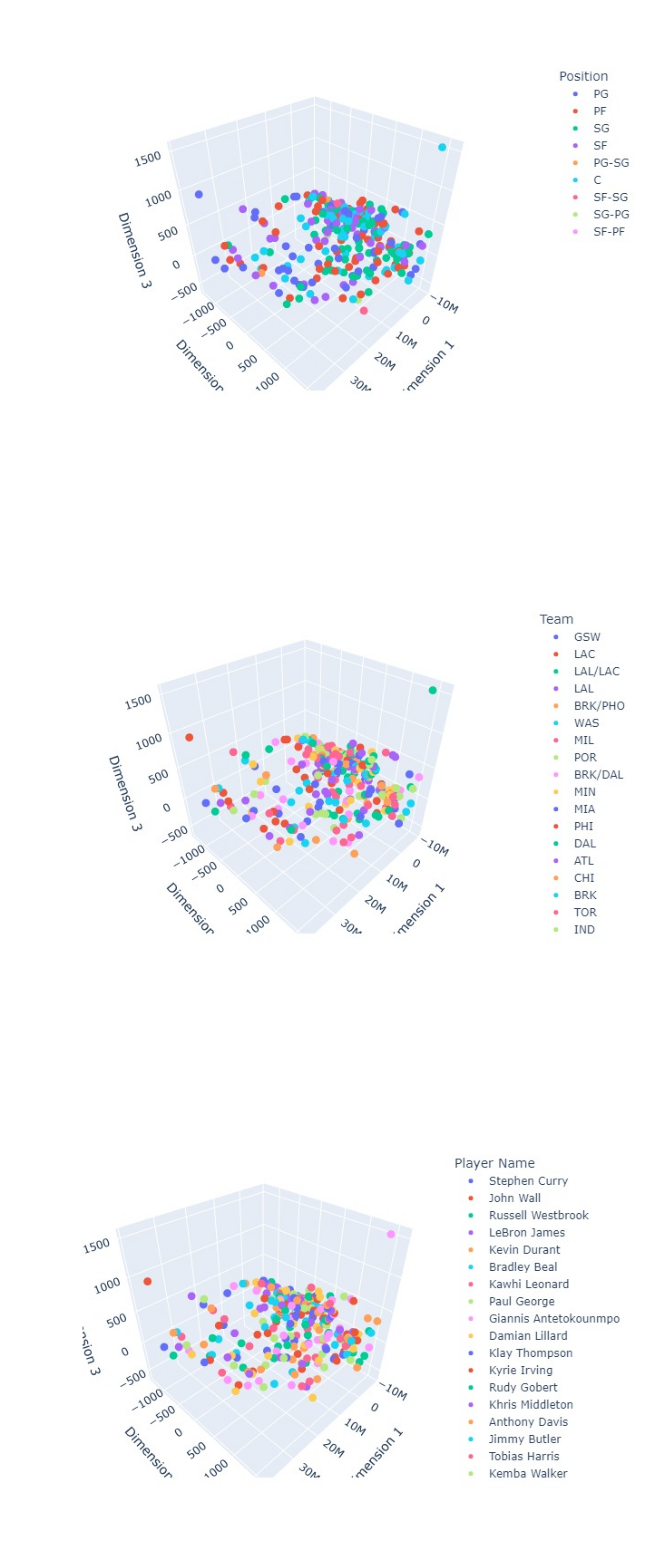

In [41]:
plot_images("./images/isomap.jpg","./images/isompa_team.jpg","./images/isomap_player.jpg")

### Comparison of all plots

Within each method of dimensionality reduction there are various hyperparameters that are able to be chanaged and have great influence on the reduction of the data. The hyperparameters for each method were experimented with and the chosen values resulted in the optimal plots of the data. 

The three dimensionality reduction techniques used are t-SNE, UMAP and ISOMAP. With regard to all three plots for each method of dimensionality reduction, consistent similarities can be seen as well as notable differences. The plot visualzing the data that has been reduced using the t-SNE method shows the greatest dispersion of the data with the points being evenly distributed across the three dimensions. This dispersion across the three dimensions is followed by the ISOMAP method where the points are distributed throughout the three dimensions but are centered lower within dimension 3 and with less space between each point. In additon there are certain outlier points that were not present in the t-SNE plot. The UMAP method exhibits very little dispersion of points, where points are not evenly distributed across the three dimensions but follow a more snake-like formation. The t-SNE plot shows the least amount of clustering of points, followed by ISOMAP and then UMAP.

Another difference is the magnitude of the scales of the three dimensions within each of the three reduction techniques. For the t-SNE method the scale across all dimensions ranges from -300 to 300, whereas with UMAP it ranges from -5 to 10 and lastly with ISOMAP the scales are much greater and range from either -1000 to 1500 in one dimension and -10 million to 40 million in the other. 

### Method of best performance

With reference to the methods described above and the noted similarities and differences in plots, the t-SNE dimensionality reduction method seems to have outperformed the other two techniques. Its even dispersion and distribution of the points across the three dimensions and in amongst the points indicates optimal performance of the reduction technique. It shows that after the data has been reduced to only three dimensions that it is still able to capture the underlying structure. The even dispersion and lack of clustering of points justifies the reduction of the data but the preservation of the information within the data. When compared to the other two techniques, the dispersion, non-clustering and distribution of the points across the three dimensions is far superior and illustrates why this dimensionality reduction technique has performed the best